In [16]:
using Plots

In [20]:
f = x->sin(x)
x = 0.5
d_true = 1.0
arr_h = 10 .^ collect(range(-18, 1, length=101))

# Keyword Arguments
diff_forward(f, x; h=sqrt(eps(Float64))) = (f(x+h) - f(x))/h
diff_central(f, x; h=cbrt(eps(Float64))) = (f(x+h/2) - f(x-h/2))/h
diff_backward(f, x; h=sqrt(eps(Float64))) = (f(x) - f(x-h))/h
diff_complex(f, x; h=1e-20) = imag(f(x + h*im)) / h

diff_complex (generic function with 1 method)

In [35]:
arr_forward = [abs(d_true - diff_forward(sin, x; h=h)/cos(x)) for h in arr_h]
arr_central = [abs(d_true - diff_central(sin, x; h=h)/cos(x)) for h in arr_h]
arr_backward = [abs(d_true - diff_backward(sin, x; h=h)/cos(x)) for h in arr_h]
arr_complex = [abs(d_true - diff_complex(sin, x; h=h)/cos(x)) for h in arr_h]
nothing

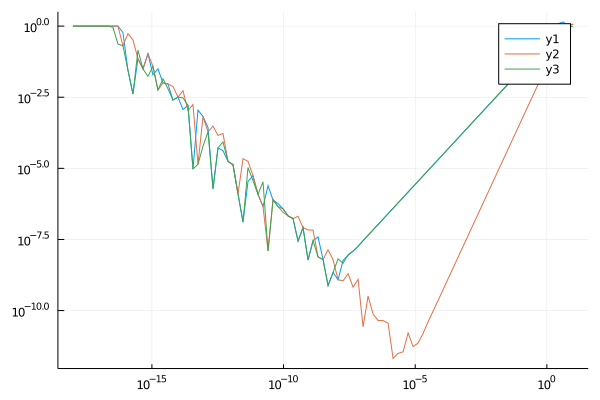

In [38]:
plot(arr_h, [arr_forward, arr_central, arr_backward], yscale=:log10, xscale=:log10)

In [43]:
arr_complex

101-element Array{Float64,1}:
    0.0
    0.0
    1.1102230246251565e-16
    0.0
    0.0
    2.220446049250313e-16
    0.0
    0.0
    0.0
    1.1102230246251565e-16
    0.0
    0.0
    2.220446049250313e-16
    ⋮
    0.001101519567100917
    0.0026435826828636877
    0.006348546179447245
    0.015269645005755672
    0.036863636104360165
    0.0897919900326245
    0.22343123256667785
    0.5850265576985774
    1.7282810271924807
    6.750090114045417
   48.318473105285975
 1100.3232874703392